In [1]:
#All cells combined take around 10 seconds to execute and generate all graphs
import matplotlib.pyplot as plt
import numpy as np
import random
from math import *
random.seed(1)
np.random.seed(1)
# Importing the required packages and setting the random seeds

In [2]:
def M(x):
    return np.where(abs(x) > 1, 0, abs(x))
#defining the required M function

In [3]:
def Inverse_CDF(x):
    val = sqrt(abs(2*x-1))
    if x > 0.5:
        return val
    else:
        return -val 
#Used to generate M distribution by using uniform distribution and Inverse CDF Approach


If the CDF of a random variable X is F(), and the U represents the uniform distribution between 0 and 1, then F-1(U) is a random variable with the same distribution as X.

Here since we know that the CDF of the M-function is given by $ sqrt(abs(2*x-1))*sgn(2x-1) $, thus we implement the M function distribution and generator using this method.

In [4]:
no=100000
#Default size 10^5

In [5]:
arr = list(map(Inverse_CDF,np.random.uniform(0.0,1.0,no)))

In [6]:
import matplotlib.pyplot as plt
def plot_RV(arr, bins = 200):
    count, bins, ignored = plt.hist(arr,200, density = True)
    plt.title("Histogram showing the M distribution")
    plt.xlabel("Value of R.V.")
    plt.ylabel("Frequency of bins")
    plt.savefig("Histogram_M.png", dpi=100)
    plt.show()

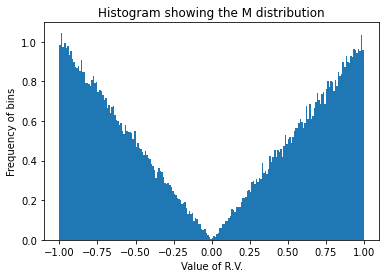

In [7]:
plot_RV(arr)

In [8]:
def plot_cdf(arr):
    least_count=0.001
    sorted_arr = np.sort(arr)
    ans=[]
    val=sorted_arr[0]
    index=0
    for i in sorted_arr:
        index+=1
        if i >val+least_count:
            val+=least_count
            ans.append(index/no)
    plt.plot(np.linspace(-1, 1, len(ans)), ans)
    plt.title("CDF of the M distribution")
    plt.xlabel("Value of R.V.")
    plt.ylabel("CDF values")
    plt.savefig("CDF_M.png", dpi=100)
    plt.show()
    
#This is a generic function used to draw a CDF when only the draws of random variable are known.

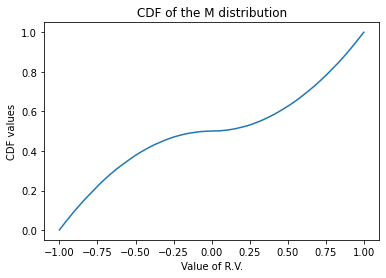

In [9]:
plot_cdf(arr)

In [10]:
def draw_RV_Y(n, lower = -1.0, upper = 1, leastCount = 0.001, size = no, pdf = M):
    arr = list(map(Inverse_CDF,np.random.uniform(0.0,1.0,size)))
    
    Y = np.array(arr)

    for i in range(n-1):
        arr = list(map(Inverse_CDF,np.random.uniform(0.0,1.0,size)))
        Y =Y+ np.array(arr)
    Y/=n
    return Y

# This function generates independent draws of the random variable Y_n by taking n such samples of X_n

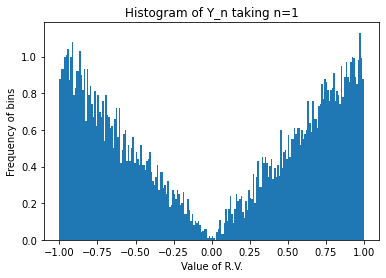

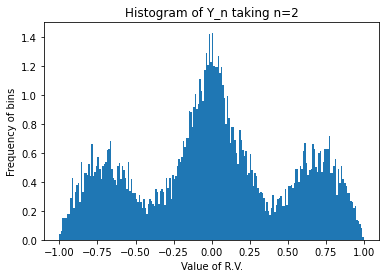

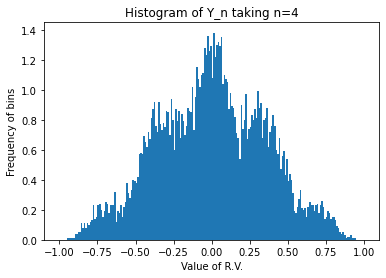

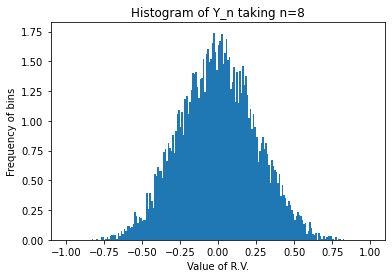

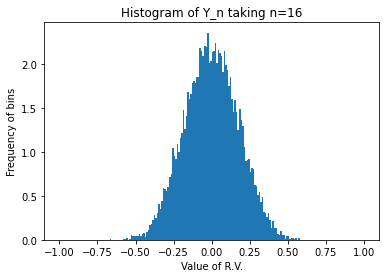

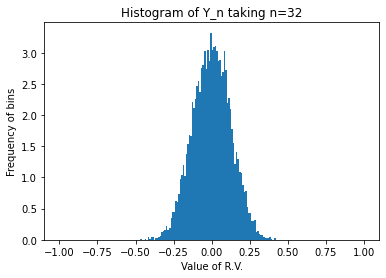

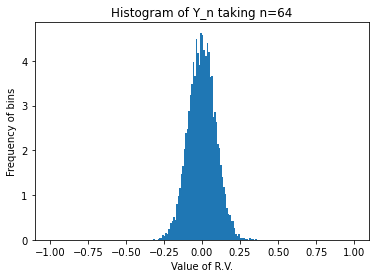

In [11]:
def plot_RV_Y(lower = -1.0, upper = 1.0, leastCount = 0.001, size = no, pdf = M, bins = 200):
    size = int(size/10)
    random_var_array=[]
    for i in [1,2,4,8,16,32,64]:
        random_var_array.append(draw_RV_Y(i, lower,upper,leastCount,size,pdf))
        count, bins, ignored = plt.hist(random_var_array[-1], bins, density = True)
        plt.title("Histogram of Y_n taking n="+  str(i))
        plt.xlabel("Value of R.V.")
        plt.ylabel("Frequency of bins")
        plt.savefig("Histogram_Y_"+str(i)+".png", dpi=100)
        plt.show()
    return random_var_array
final_array = plot_RV_Y()

#This function generates all the histograms for our variable Y for the range [1,2,4,8,16,32,64]

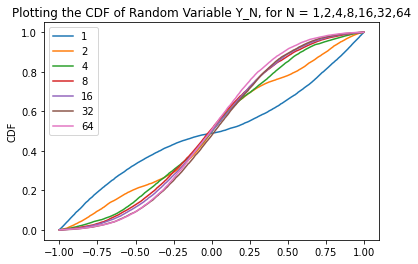

In [12]:
def plot_cdf_Y(final_arr, no):
    least_count=0.001
    main_index=1
    for arr in final_arr:
        sorted_arr = np.sort(arr)
        sorted_arr-=sorted_arr.mean()
        ans=[]
        val=sorted_arr[0]
        index=0
        for i in sorted_arr:
            index+=1
            if i >val+least_count:
                val=i
                ans.append(index/no)
        plt.plot(np.linspace(-1, 1, len(ans)), ans, label = str(main_index))
        main_index*=2
    plt.ylabel("CDF")
    plt.title("Plotting the CDF of Random Variable Y_N, for N = 1,2,4,8,16,32,64")
    plt.legend()   
    plt.savefig("Combined_CDF.png", dpi=100)
    plt.show()

#Kindly refer to the png generated for better clarity on the image
plot_cdf_Y( final_array, len(final_array[-1]) )

In [13]:
#End of Question 4